In [60]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [61]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000,90.000,size=1500)
lngs = np.random.uniform(-180.000, 180.000,size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [62]:
coordinates = list(lat_lngs)

In [63]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
        city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
        # If the city is unique, then we will add it to the cities list.
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

1500

In [64]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [65]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=874420077e6feaade6650c8200445dc8


In [66]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if(i%50 == 0 and i >= 50):
        set_count+=1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count+=1


# Run an API request for each of the cities.
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | bitam
Processing Record 5 of Set 1 | hay river
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | mabaruma
Processing Record 8 of Set 1 | clonakilty
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | vardo
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | carnot
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | almaty
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | biltine
Processing Record 21 of Set 1 | saint george
Processing Record 22 of Set 1 | zhezkazgan
Processing Record 23 of Set 1 | non sang
Processing Rec

City not found. Skipping...
Processing Record 41 of Set 4 | punta arenas
Processing Record 42 of Set 4 | hilo
Processing Record 43 of Set 4 | huoqiu
Processing Record 44 of Set 4 | aklavik
Processing Record 45 of Set 4 | christiansburg
Processing Record 46 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 47 of Set 4 | grand centre
City not found. Skipping...
Processing Record 48 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 49 of Set 4 | rikitea
Processing Record 50 of Set 4 | esperance
Processing Record 1 of Set 5 | geraldton
Processing Record 2 of Set 5 | dikson
Processing Record 3 of Set 5 | dossor
Processing Record 4 of Set 5 | yaan
Processing Record 5 of Set 5 | roma
Processing Record 6 of Set 5 | coahuayana
Processing Record 7 of Set 5 | whitehorse
Processing Record 8 of Set 5 | kapaa
Processing Record 9 of Set 5 | pitanga
Processing Record 10 of Set 5 | ushuaia
Processing Record 11 of Set 5 | upernavik
Processing Record 12 of Set

Processing Record 31 of Set 8 | jamestown
Processing Record 32 of Set 8 | ismailia
Processing Record 33 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 34 of Set 8 | hobart
Processing Record 35 of Set 8 | atuona
Processing Record 36 of Set 8 | gurgan
City not found. Skipping...
Processing Record 37 of Set 8 | albany
Processing Record 38 of Set 8 | warrington
Processing Record 39 of Set 8 | ushuaia
Processing Record 40 of Set 8 | gilroy
Processing Record 41 of Set 8 | mount gambier
Processing Record 42 of Set 8 | jamestown
Processing Record 43 of Set 8 | lesnoy
Processing Record 44 of Set 8 | saint-augustin
Processing Record 45 of Set 8 | hermanus
Processing Record 46 of Set 8 | yellowknife
Processing Record 47 of Set 8 | svetlyy
Processing Record 48 of Set 8 | salalah
Processing Record 49 of Set 8 | hobart
Processing Record 50 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 1 of Set 9 | new norfolk
Processing Record 2 of Set 9 | berl

Processing Record 15 of Set 12 | mombasa
Processing Record 16 of Set 12 | wahran
City not found. Skipping...
Processing Record 17 of Set 12 | huarmey
Processing Record 18 of Set 12 | saint-philippe
Processing Record 19 of Set 12 | kangaba
Processing Record 20 of Set 12 | bengkulu
Processing Record 21 of Set 12 | cherskiy
Processing Record 22 of Set 12 | castro
Processing Record 23 of Set 12 | malartic
Processing Record 24 of Set 12 | yaring
Processing Record 25 of Set 12 | bluff
Processing Record 26 of Set 12 | rikitea
Processing Record 27 of Set 12 | amderma
City not found. Skipping...
Processing Record 28 of Set 12 | potam
Processing Record 29 of Set 12 | tuktoyaktuk
Processing Record 30 of Set 12 | chuy
Processing Record 31 of Set 12 | bilibino
Processing Record 32 of Set 12 | ushuaia
Processing Record 33 of Set 12 | narsaq
Processing Record 34 of Set 12 | ushuaia
Processing Record 35 of Set 12 | kolda
Processing Record 36 of Set 12 | mitu
Processing Record 37 of Set 12 | thompson
P

City not found. Skipping...
Processing Record 1 of Set 16 | chokurdakh
Processing Record 2 of Set 16 | souillac
Processing Record 3 of Set 16 | kruisfontein
Processing Record 4 of Set 16 | syumsi
Processing Record 5 of Set 16 | rikitea
Processing Record 6 of Set 16 | vaini
Processing Record 7 of Set 16 | yulara
Processing Record 8 of Set 16 | naryan-mar
Processing Record 9 of Set 16 | hue
Processing Record 10 of Set 16 | kaitangata
Processing Record 11 of Set 16 | rundu
Processing Record 12 of Set 16 | ushuaia
Processing Record 13 of Set 16 | atuona
Processing Record 14 of Set 16 | luwuk
Processing Record 15 of Set 16 | ajdabiya
Processing Record 16 of Set 16 | jamestown
Processing Record 17 of Set 16 | albany
Processing Record 18 of Set 16 | bluff
Processing Record 19 of Set 16 | atuona
Processing Record 20 of Set 16 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 16 | mys shmidta
City not found. Skipping...
Processing Record 22 of Set 16 | albany
Processing Record

Processing Record 35 of Set 19 | jamestown
Processing Record 36 of Set 19 | basoko
Processing Record 37 of Set 19 | bluff
Processing Record 38 of Set 19 | mayya
Processing Record 39 of Set 19 | rikitea
Processing Record 40 of Set 19 | samusu
City not found. Skipping...
Processing Record 41 of Set 19 | coquimbo
Processing Record 42 of Set 19 | rikitea
Processing Record 43 of Set 19 | vaini
Processing Record 44 of Set 19 | carnarvon
Processing Record 45 of Set 19 | east london
Processing Record 46 of Set 19 | coihaique
Processing Record 47 of Set 19 | honiara
Processing Record 48 of Set 19 | georgetown
Processing Record 49 of Set 19 | puerto ayora
Processing Record 50 of Set 19 | mataura
Processing Record 1 of Set 20 | sobolevo
Processing Record 2 of Set 20 | ushuaia
Processing Record 3 of Set 20 | eau claire
Processing Record 4 of Set 20 | carutapera
Processing Record 5 of Set 20 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 20 | ribeira grande
Processing Record

Processing Record 20 of Set 23 | torbay
Processing Record 21 of Set 23 | new norfolk
Processing Record 22 of Set 23 | guerrero negro
Processing Record 23 of Set 23 | angra dos reis
Processing Record 24 of Set 23 | rikitea
Processing Record 25 of Set 23 | san jose
Processing Record 26 of Set 23 | yar-sale
Processing Record 27 of Set 23 | bandarbeyla
Processing Record 28 of Set 23 | esperance
Processing Record 29 of Set 23 | east london
Processing Record 30 of Set 23 | vaini
Processing Record 31 of Set 23 | hasaki
Processing Record 32 of Set 23 | gotsu
Processing Record 33 of Set 23 | ushuaia
Processing Record 34 of Set 23 | norden
Processing Record 35 of Set 23 | hobart
Processing Record 36 of Set 23 | rikitea
Processing Record 37 of Set 23 | aasiaat
Processing Record 38 of Set 23 | cape town
Processing Record 39 of Set 23 | sao filipe
Processing Record 40 of Set 23 | taolanaro
City not found. Skipping...
Processing Record 41 of Set 23 | saskylakh
Processing Record 42 of Set 23 | cabo s

Processing Record 6 of Set 27 | tshela
Processing Record 7 of Set 27 | ribeira grande
Processing Record 8 of Set 27 | torbay
Processing Record 9 of Set 27 | provideniya
Processing Record 10 of Set 27 | dali
Processing Record 11 of Set 27 | punta arenas
Processing Record 12 of Set 27 | vostok
Processing Record 13 of Set 27 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 27 | arak
Processing Record 15 of Set 27 | vaini
Processing Record 16 of Set 27 | vardo
Processing Record 17 of Set 27 | tazovskiy
Processing Record 18 of Set 27 | bredasdorp
Processing Record 19 of Set 27 | vaini
Processing Record 20 of Set 27 | mar del plata
Processing Record 21 of Set 27 | zbarazh
Processing Record 22 of Set 27 | itanagar
Processing Record 23 of Set 27 | atuona
Processing Record 24 of Set 27 | atuona
Processing Record 25 of Set 27 | samusu
City not found. Skipping...
Processing Record 26 of Set 27 | kodiak
Processing Record 27 of Set 27 | ushuaia
Processing Record 28 of Set 27 | us

Processing Record 36 of Set 30 | aguimes
Processing Record 37 of Set 30 | new norfolk
Processing Record 38 of Set 30 | gazojak
Processing Record 39 of Set 30 | ternate
Processing Record 40 of Set 30 | novokruchininskiy
Processing Record 41 of Set 30 | hobart
Processing Record 42 of Set 30 | paamiut
Processing Record 43 of Set 30 | saint-philippe
Processing Record 44 of Set 30 | mackay
Processing Record 45 of Set 30 | skibbereen
Processing Record 46 of Set 30 | jamestown
Processing Record 47 of Set 30 | rikitea
Processing Record 48 of Set 30 | vaitape
Processing Record 49 of Set 30 | bredasdorp
Processing Record 50 of Set 30 | punta arenas
-----------------------------
Data Retrieval Complete      
-----------------------------


In [67]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.73,-155.09,80.60,61,40,20.80,US,2020-03-03 01:22:08
1,Rikitea,-23.12,-134.97,80.24,80,100,24.09,PF,2020-03-03 01:22:28
2,Vaini,-21.20,-175.20,86.00,70,20,10.29,TO,2020-03-03 01:22:29
3,Bitam,2.08,11.50,70.97,98,87,1.25,GA,2020-03-03 01:22:29
4,Hay River,60.82,-115.80,-0.40,77,90,9.17,CA,2020-03-03 01:22:29
5,Mahebourg,-20.41,57.70,80.60,94,75,3.36,MU,2020-03-03 01:22:29
6,Mabaruma,8.20,-59.78,70.92,92,94,2.64,GY,2020-03-03 01:22:29
7,Clonakilty,51.62,-8.87,36.00,65,20,8.05,IE,2020-03-03 01:22:30
8,Punta Arenas,-53.15,-70.92,53.60,71,40,5.82,CL,2020-03-03 01:22:30
9,Mataura,-46.19,168.86,61.00,67,100,15.99,NZ,2020-03-03 01:22:30


In [68]:
columns = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2020-03-03 01:22:08,19.73,-155.09,80.60,61,40,20.80
1,Rikitea,PF,2020-03-03 01:22:28,-23.12,-134.97,80.24,80,100,24.09
2,Vaini,TO,2020-03-03 01:22:29,-21.20,-175.20,86.00,70,20,10.29
3,Bitam,GA,2020-03-03 01:22:29,2.08,11.50,70.97,98,87,1.25
4,Hay River,CA,2020-03-03 01:22:29,60.82,-115.80,-0.40,77,90,9.17
5,Mahebourg,MU,2020-03-03 01:22:29,-20.41,57.70,80.60,94,75,3.36
6,Mabaruma,GY,2020-03-03 01:22:29,8.20,-59.78,70.92,92,94,2.64
7,Clonakilty,IE,2020-03-03 01:22:30,51.62,-8.87,36.00,65,20,8.05
8,Punta Arenas,CL,2020-03-03 01:22:30,-53.15,-70.92,53.60,71,40,5.82
9,Mataura,NZ,2020-03-03 01:22:30,-46.19,168.86,61.00,67,100,15.99


In [69]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [70]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

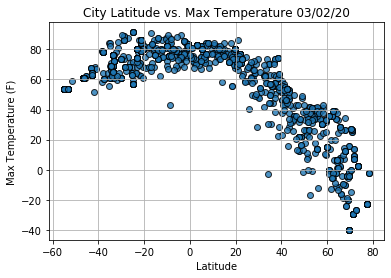

In [71]:
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

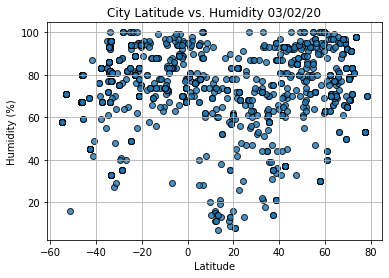

In [72]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

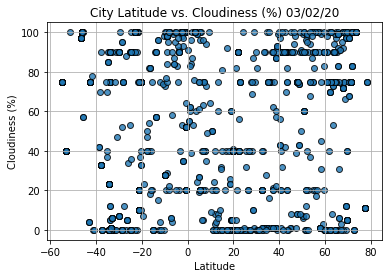

In [73]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

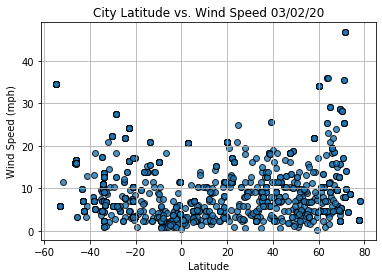

In [74]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [87]:
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    


In [88]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2020-03-03 01:22:08,19.73,-155.09,80.60,61,40,20.80
3,Bitam,GA,2020-03-03 01:22:29,2.08,11.50,70.97,98,87,1.25
4,Hay River,CA,2020-03-03 01:22:29,60.82,-115.80,-0.40,77,90,9.17
6,Mabaruma,GY,2020-03-03 01:22:29,8.20,-59.78,70.92,92,94,2.64
7,Clonakilty,IE,2020-03-03 01:22:30,51.62,-8.87,36.00,65,20,8.05
...,...,...,...,...,...,...,...,...,...
1357,Ternate,ID,2020-03-03 01:26:18,0.80,127.40,81.00,81,62,2.46
1358,Novokruchininskiy,RU,2020-03-03 01:27:12,51.78,113.77,-0.40,77,7,2.24
1360,Paamiut,GL,2020-03-03 01:24:27,61.99,-49.67,-5.82,63,0,13.33
1363,Skibbereen,IE,2020-03-03 01:27:13,51.55,-9.27,32.00,63,20,8.05


In [89]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

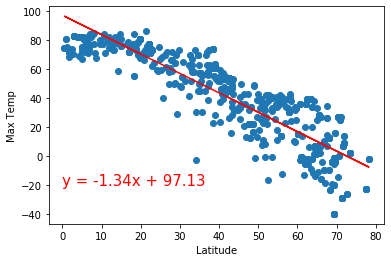

In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(0,-20))

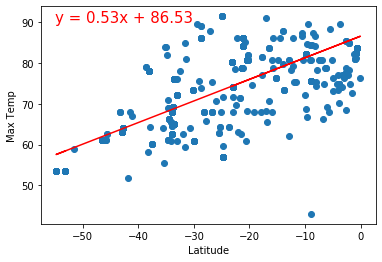

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-55,90))

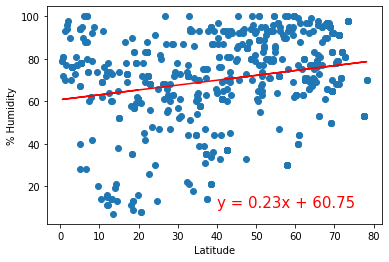

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

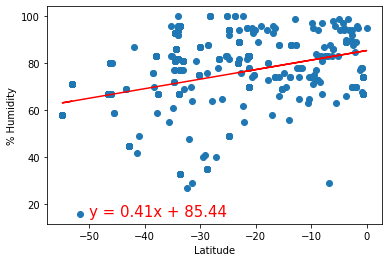

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

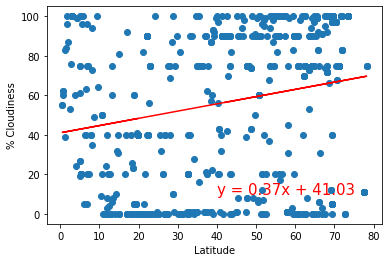

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

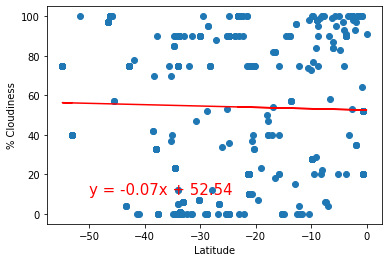

In [95]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,10))

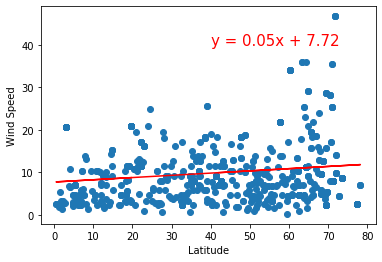

In [98]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,40))

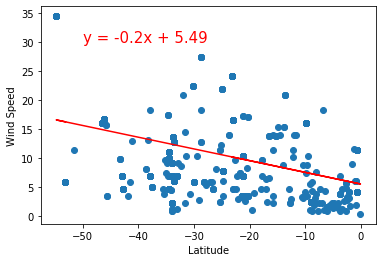

In [101]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,30))